Piecewise Functions
===================

In [323]:
import numpy as np
import sympy as sm
from matplotlib import pyplot as plt

In [324]:
t = sm.symbols('t', real=True)

In [379]:
x = np.linspace(0, 10, 1000)

In [380]:
z = np.linspace(-1, 1, 1000)

A piecewise function is a function composed of multiple subfunctions, each of which belonging to a certain subdomain of the function. For example:

In [381]:
f_p = sm.Piecewise(
    (1, 6 >= t), 
    (2, t > 6)
)
f_p

Piecewise((1, t <= 6), (2, True))

To plot piecewise functions, let's define a helper to pull out the domain and range of the function.

In [382]:
def evaluate_piecewise(f, t, x):
    results = []
    all_matched = np.full(x.shape, False)
    
    for expr, cond in f.args:
        matched = sm.lambdify(t, cond)(x)
        x_matched = x[(~all_matched) & matched]
        all_matched |= matched
        y_matched = np.array(
            sm.lambdify(t, expr)(x_matched)
        ).reshape(-1)
        results.append(
            np.broadcast_arrays(x_matched, y_matched)
        )
    return results

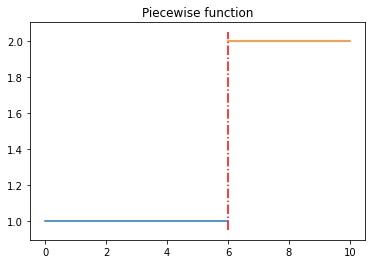

In [383]:
plt.figure()
plt.title("Piecewise function")
for xx, yy in evaluate_piecewise(f_p, t, x):
    plt.plot(xx, yy)
plt.vlines(6, *plt.ylim(), linestyle="dashdot", color="red");

When used as a prefix, *piecewise* implies a property holds on each subdomain **but not necessarily on the whole domain**.

Piecewise Continuous
--------------------
A function $f(x)$ is *piecewise* [continuous on a closed interval](https://math.libretexts.org/Courses/Monroe_Community_College/MTH_210_Calculus_I/Chapter_2_Limits/2.6%3A_Continuity#Continuity_over_an_Interval) $[a,b]$ iff. it can be decomposed into a finite set of $i=1\dots K$ open subintervals where $a=c_0 < c_1 < \dots < c_{K} = b$, such that [$f(x)$ is continuous](https://mathworld.wolfram.com/ContinuousFunction.html) $\forall x\in (c_{i-1},c_i)$, and the interior one-sided limits of the interval endpoints exist and are finite.[^1][^2] This is equivalent to say that there are $K$ continuous functions $g_i(x)$ on $[c_i,c_{i+1}]$ such that $f(x)=g_i(x)$ for $x \in (c_{i-1},c_i)$.

Consider a piecewise function comprised of two quadratic functions on the interval $[a, b]$. There are two sub-intervals $[a, x_0)$ and $[x_0, b]$.

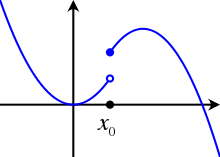

In this case, $f(x)$ is continuous on both (open) subintervals, has defined interior limits, and therefore is piecewise continuous.

As defined above, this does not imply that it is continuous on its entire domain.
[^1]: https://proofwiki.org/wiki/Definition:Piecewise_Continuous_Function
[^2]: http://websupport1.citytech.cuny.edu/faculty/vgitman/diffeqs/lecture17.pdf

Another example is the *floor* function $f(x)=\lfloor x\rfloor$, whose interval plot is
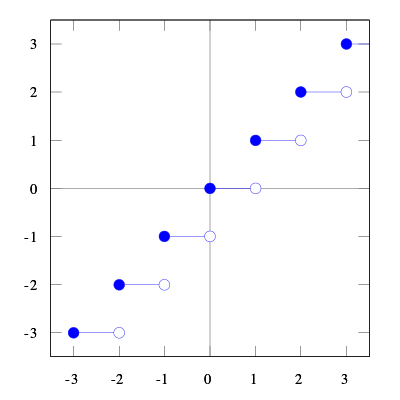

Whilst $\lfloor x\rfloor$ is not continuous for $x \in \mathbb{I}$, it is continuous for the subintervals $(x_i, x_i+1)$ where $x_i \in \mathbb{I}$.

Consider the following function

In [384]:
f_pc = sm.Piecewise(
    ((t - 4)**2, t<6), 
    (4 - t, t>=6)
)
f_pc

Piecewise(((t - 4)**2, t < 6), (4 - t, True))

Clearly it is piecewise continuous

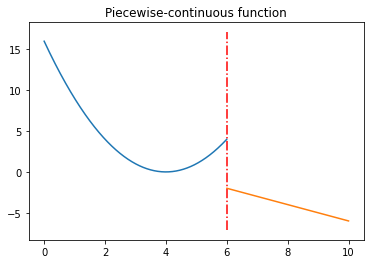

In [385]:
plt.figure()
plt.title("Piecewise-continuous function")
for xx, yy in evaluate_piecewise(f_pc, t, x):
    plt.plot(xx, yy)
plt.vlines(6, *plt.ylim(), linestyle="dashdot", color="red");

A more complicated example is the function

In [386]:
f_pc_sin = t * sm.sin(1 / t)
f_pc_sin

t*sin(1/t)

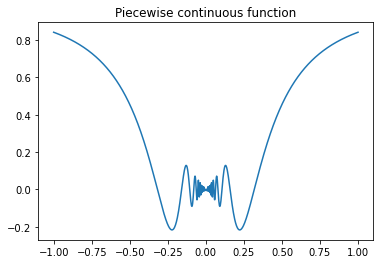

In [388]:
plt.figure()
plt.title("Piecewise continuous function")
plt.plot(z, sm.lambdify(t, f_pc_sin)(z));

By itself, $\sin\mleftright{(}{\frac{1}{t}}{)}$ is not piecewise continuous for $t=0$. Whilst it is continuous on the open intervals $(0,\infty)$ and $(-\infty, 0)$, if we consider the interior limit
$$
\lim_{t\rightarrow 0^+}\sin\mleftright{(}{\frac{1}{t}}{)} \iff \lim_{w\rightarrow \infty}\sin\mleftright{(}{w}{)}\,,
$$
it clearly oscillates between $0$ and $1$, and therefore is not defined.

Meanwhile, $t\sin\mleftright{(}{\frac{1}{t}}{)}$ *is* piecewise continuous, because the limit
$$
\lim_{t\rightarrow 0^+}t\sin\mleftright{(}{\frac{1}{t}}{)} = 0\,,
$$ is defined.

Piecewise Smooth
----------------
A piecewise smooth function is ($n$-)smooth (it is continuous and there exist $n$ continuous derivatives at each point) on each of its subdomains. Our previous continuous function has a continuous first derivative on each subdomain:

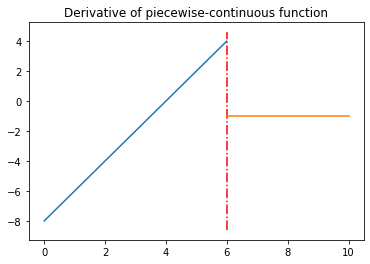

In [390]:
plt.figure()
plt.title("Derivative of piecewise-continuous function")
for xx, yy in evaluate_piecewise(sm.diff(f_pc), t, x):
    plt.plot(xx, yy)
plt.vlines(6, *plt.ylim(), linestyle="dashdot", color="red");

Whereas a smooth function does:

In [8]:
plt.figure(title="Derivative of piecewise-smooth function")
plt.plot(x, sm.lambdify(t, sm.diff(smooth), 'numpy')(x))
plt.vline(5, line_style="dash_dotted", colors=["red"], stroke_width=2)
plt.show()